# **Menyiapkan Dataset**

In [ ]:
# melakukan download dataset 

!wget --no-check-certificate \
  https://github.com/mawargun/Bangkit-Project/raw/main/Wellbeing_and_lifestyle_data.zip \
  -O /tmp/Wellbeing_and_lifestyle_data.zip

--2023-06-05 05:50:05--  https://github.com/mawargun/Bangkit-Project/raw/main/Wellbeing_and_lifestyle_data.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mawargun/Bangkit-Project/main/Wellbeing_and_lifestyle_data.zip [following]
--2023-06-05 05:50:05--  https://raw.githubusercontent.com/mawargun/Bangkit-Project/main/Wellbeing_and_lifestyle_data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 301853 (295K) [application/zip]
Saving to: ‘/tmp/Wellbeing_and_lifestyle_data.zip’

/tmp/Wellbeing_and_ 100%[===================>] 294.78K  --.-KB/s    in 0.03s   

2023-06-05 05:50:05 (9.13 MB/s) -

In [ ]:
#import library yang dibutuhkan
import zipfile
import os
import pandas as pd
import numpy as np
import plotly.express as px
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats
print("numpy version is "+np.__version__)
print("tensorflow version is "+tf.__version__)
local_zip = '/tmp/Wellbeing_and_lifestyle_data.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')   #read zip file
zip_ref.extractall('/tmp') #melakukan ekstact zipfile kemudian ditaruh pada directory tmp
zip_ref.close()

numpy version is 1.22.4
tensorflow version is 2.12.0


In [ ]:
directory = '/tmp'
files_in_directory = os.listdir(directory)
print(files_in_directory)


['dap_multiplexer.INFO', 'pyright-339-3v22ZfNjSTzE', 'debugger_ewqnwcfqj', 'Wellbeing_and_lifestyle_data.csv', 'pyright-339-QeZXaZR6yUdt', 'python-languageserver-cancellation', 'language_service.86de35be6719.root.log.INFO.20230605-054926.331', 'dap_multiplexer.86de35be6719.root.log.INFO.20230605-054844.103', 'Wellbeing_and_lifestyle_data.zip', 'initgoogle_syslog_dir.0', 'language_service.INFO']


In [ ]:

csv_file_path = '/tmp/Wellbeing_and_lifestyle_data.csv' 
df = pd.read_csv(csv_file_path)


In [ ]:
df.head() # melihat data awal

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


In [ ]:
#Describe the data to find outliers
df.describe()

,FRUITS_VEGGIES,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE
count,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000,15972.000000
mean,2.922677,5.232970,5.508077,5.616454,6.474267,4.000751,2.715314,1.410656,5.745993,3.194778,5.703606,3.752129,7.042888,2.898886,2.930879,1.728963,5.711558,3.326572,6.233346,666.751503
std,1.442694,3.311912,2.840334,3.242021,3.086672,2.755837,1.851586,0.491968,2.624097,2.357518,2.891013,3.230987,1.199044,3.692180,2.676301,0.444509,3.089630,2.729293,3.016571,45.019868
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,480.000000
25%,2.000000,2.000000,3.000000,3.000000,4.000000,2.000000,1.000000,1.000000,4.000000,1.000000,3.000000,1.000000,6.000000,0.000000,1.000000,1.000000,3.000000,1.000000,4.000000,636.000000
50%,3.000000,5.000000,5.000000,5.000000,6.000000,3.000000,3.000000,1.000000,6.000000,3.000000,5.000000,3.000000,7.000000,0.000000,2.000000,2.000000,5.000000,3.000000,7.000000,667.700000
75%,4.000000,8.000000,8.000000,10.000000,10.000000,6.000000,5.000000,2.000000,8.000000,5.000000,8.000000,5.000000,8.000000,5.000000,4.000000,2.000000,9.000000,5.000000,10.000000,698.500000
max,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,10.000000,10.000000,10.000000,820.200000


Finding outliers data on WORK_LIFE_BALANCE_SCORE

In [ ]:

fig = px.box(df,y="WORK_LIFE_BALANCE_SCORE")
fig.show()

Found outliers! So we need to remove it 

In [ ]:


for x in ['WORK_LIFE_BALANCE_SCORE']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

df.isnull().sum()



Timestamp                   0
FRUITS_VEGGIES              0
DAILY_STRESS                0
PLACES_VISITED              0
CORE_CIRCLE                 0
SUPPORTING_OTHERS           0
SOCIAL_NETWORK              0
ACHIEVEMENT                 0
DONATION                    0
BMI_RANGE                   0
TODO_COMPLETED              0
FLOW                        0
DAILY_STEPS                 0
LIVE_VISION                 0
SLEEP_HOURS                 0
LOST_VACATION               0
DAILY_SHOUTING              0
SUFFICIENT_INCOME           0
PERSONAL_AWARDS             0
TIME_FOR_PASSION            0
WEEKLY_MEDITATION           0
AGE                         0
GENDER                      0
WORK_LIFE_BALANCE_SCORE    71
dtype: int64

In [ ]:
df = df.dropna(axis = 0)

In [ ]:
df.isnull().sum()


Timestamp                  0
FRUITS_VEGGIES             0
DAILY_STRESS               0
PLACES_VISITED             0
CORE_CIRCLE                0
SUPPORTING_OTHERS          0
SOCIAL_NETWORK             0
ACHIEVEMENT                0
DONATION                   0
BMI_RANGE                  0
TODO_COMPLETED             0
FLOW                       0
DAILY_STEPS                0
LIVE_VISION                0
SLEEP_HOURS                0
LOST_VACATION              0
DAILY_SHOUTING             0
SUFFICIENT_INCOME          0
PERSONAL_AWARDS            0
TIME_FOR_PASSION           0
WEEKLY_MEDITATION          0
AGE                        0
GENDER                     0
WORK_LIFE_BALANCE_SCORE    0
dtype: int64

In [ ]:
data_types = df.dtypes
print(data_types)

Timestamp                   object
FRUITS_VEGGIES               int64
DAILY_STRESS                object
PLACES_VISITED               int64
CORE_CIRCLE                  int64
SUPPORTING_OTHERS            int64
SOCIAL_NETWORK               int64
ACHIEVEMENT                  int64
DONATION                     int64
BMI_RANGE                    int64
TODO_COMPLETED               int64
FLOW                         int64
DAILY_STEPS                  int64
LIVE_VISION                  int64
SLEEP_HOURS                  int64
LOST_VACATION                int64
DAILY_SHOUTING               int64
SUFFICIENT_INCOME            int64
PERSONAL_AWARDS              int64
TIME_FOR_PASSION             int64
WEEKLY_MEDITATION            int64
AGE                         object
GENDER                      object
WORK_LIFE_BALANCE_SCORE    float64
dtype: object


Change Timestamp data type from object to datime, and filter the data from 2021

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df = df[(df['Timestamp'].dt.year == 2021)]
# Filter the data for the desired date range
df.tail()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
15967,2021-03-14 05:42:00,3,3,0,4,0,10,0,4,2,...,7,0,1,1,5,2,5,51 or more,Female,644.5
15968,2021-03-14 06:30:00,3,3,6,8,7,4,6,3,1,...,6,0,0,2,10,5,8,21 to 35,Female,714.9
15969,2021-03-14 08:35:00,4,3,0,10,10,8,6,5,1,...,7,0,1,2,10,1,10,21 to 35,Male,716.6
15970,2021-03-14 08:43:00,1,1,10,8,2,7,3,2,1,...,8,7,2,2,1,6,8,21 to 35,Female,682.0
15971,2021-03-14 09:03:00,5,4,0,2,10,10,5,1,2,...,8,5,2,2,1,8,4,21 to 35,Female,651.4


In [ ]:
column_counts = df.count()
print(column_counts)

Timestamp                  370
FRUITS_VEGGIES             370
DAILY_STRESS               370
PLACES_VISITED             370
CORE_CIRCLE                370
SUPPORTING_OTHERS          370
SOCIAL_NETWORK             370
ACHIEVEMENT                370
DONATION                   370
BMI_RANGE                  370
TODO_COMPLETED             370
FLOW                       370
DAILY_STEPS                370
LIVE_VISION                370
SLEEP_HOURS                370
LOST_VACATION              370
DAILY_SHOUTING             370
SUFFICIENT_INCOME          370
PERSONAL_AWARDS            370
TIME_FOR_PASSION           370
WEEKLY_MEDITATION          370
AGE                        370
GENDER                     370
WORK_LIFE_BALANCE_SCORE    370
dtype: int64


**Dropping timestamp columns**

In [ ]:
df = df.drop("Timestamp", axis=1)

In [ ]:
columns = df.columns
print(columns)

Index(['FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED', 'CORE_CIRCLE',
       'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION',
       'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION',
       'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME',
       'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'AGE',
       'GENDER', 'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')


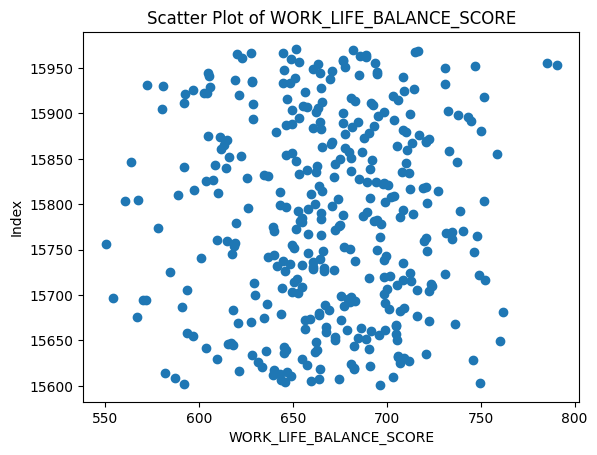

In [ ]:

# Scatter plot
plt.scatter(df['WORK_LIFE_BALANCE_SCORE'], df.index)

# Set labels and title
plt.xlabel('WORK_LIFE_BALANCE_SCORE')
plt.ylabel('Index')
plt.title('Scatter Plot of WORK_LIFE_BALANCE_SCORE')

# Show the plot
plt.show()


In [ ]:
#one-hot encoding
df['GENDER'].replace('Female', 1, inplace=True)
df['GENDER'].replace('Male', 0, inplace=True)

Female = 1, male = 0

In [ ]:
df.tail()

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
15967,3,3,0,4,0,10,0,4,2,8,...,7,0,1,1,5,2,5,51 or more,1,644.5
15968,3,3,6,8,7,4,6,3,1,7,...,6,0,0,2,10,5,8,21 to 35,1,714.9
15969,4,3,0,10,10,8,6,5,1,7,...,7,0,1,2,10,1,10,21 to 35,0,716.6
15970,1,1,10,8,2,7,3,2,1,6,...,8,7,2,2,1,6,8,21 to 35,1,682.0
15971,5,4,0,2,10,10,5,1,2,7,...,8,5,2,2,1,8,4,21 to 35,1,651.4


Finding unique value in non-integer columns

In [ ]:
print(df['AGE'].unique())
print("Unique value from daily_stress column is:"+df['DAILY_STRESS'].unique())

['36 to 50' '51 or more' '21 to 35' 'Less than 20']
['Unique value from daily_stress column is:3'
 'Unique value from daily_stress column is:1'
 'Unique value from daily_stress column is:5'
 'Unique value from daily_stress column is:2'
 'Unique value from daily_stress column is:4'
 'Unique value from daily_stress column is:0']


Changing the DAILY_STRESS value to integer 

In [ ]:
df['DAILY_STRESS'].replace('0', 0, inplace=True)
df['DAILY_STRESS'].replace('1', 1, inplace=True)
df['DAILY_STRESS'].replace('2', 2, inplace=True)
df['DAILY_STRESS'].replace('3', 3, inplace=True)
df['DAILY_STRESS'].replace('4', 4, inplace=True)
df['DAILY_STRESS'].replace('5', 5, inplace=True)

print(df['DAILY_STRESS'].unique())

[3 1 5 2 4 0]


One hot encoding the age column

In [ ]:
age_one_hot_encoded = pd.get_dummies(df['AGE'])
df_encoded = pd.concat([df, age_one_hot_encoded], axis=1)

Drop the uneeded column

In [ ]:
#drop the age column
df_encoded= df_encoded.drop('AGE', axis=1)

print(df_encoded.dtypes)


FRUITS_VEGGIES               int64
DAILY_STRESS                 int64
PLACES_VISITED               int64
CORE_CIRCLE                  int64
SUPPORTING_OTHERS            int64
SOCIAL_NETWORK               int64
ACHIEVEMENT                  int64
DONATION                     int64
BMI_RANGE                    int64
TODO_COMPLETED               int64
FLOW                         int64
DAILY_STEPS                  int64
LIVE_VISION                  int64
SLEEP_HOURS                  int64
LOST_VACATION                int64
DAILY_SHOUTING               int64
SUFFICIENT_INCOME            int64
PERSONAL_AWARDS              int64
TIME_FOR_PASSION             int64
WEEKLY_MEDITATION            int64
GENDER                       int64
WORK_LIFE_BALANCE_SCORE    float64
21 to 35                     uint8
36 to 50                     uint8
51 or more                   uint8
Less than 20                 uint8
dtype: object


Move the target label to the last column

In [ ]:
column_to_move = 'WORK_LIFE_BALANCE_SCORE'
moved_column = df_encoded.pop(column_to_move)
df_encoded = df_encoded.assign(WORK_LIFE_BALANCE_SCORE=moved_column)
print(df_encoded.dtypes)

FRUITS_VEGGIES               int64
DAILY_STRESS                 int64
PLACES_VISITED               int64
CORE_CIRCLE                  int64
SUPPORTING_OTHERS            int64
SOCIAL_NETWORK               int64
ACHIEVEMENT                  int64
DONATION                     int64
BMI_RANGE                    int64
TODO_COMPLETED               int64
FLOW                         int64
DAILY_STEPS                  int64
LIVE_VISION                  int64
SLEEP_HOURS                  int64
LOST_VACATION                int64
DAILY_SHOUTING               int64
SUFFICIENT_INCOME            int64
PERSONAL_AWARDS              int64
TIME_FOR_PASSION             int64
WEEKLY_MEDITATION            int64
GENDER                       int64
21 to 35                     uint8
36 to 50                     uint8
51 or more                   uint8
Less than 20                 uint8
WORK_LIFE_BALANCE_SCORE    float64
dtype: object


In [ ]:
#check corelation between age and work life balance score
import scipy.stats as stats

stats.pointbiserialr(df_encoded["GENDER"],df_encoded["WORK_LIFE_BALANCE_SCORE"])

SignificanceResult(statistic=0.008379678719509938, pvalue=0.872373985262232)

Because the p-value is no less than .05, this correlation is not statistically significant

Checking if the WORK_LIFE_BALANCE data is normally distributed

In [ ]:
from scipy.stats import shapiro 

shapiro(df_encoded["WORK_LIFE_BALANCE_SCORE"])

ShapiroResult(statistic=0.9943022131919861, pvalue=0.18352697789669037)

Since in the above example, the p-value is 0.18 which is more than the threshold(0.05) which is the alpha(0.05) then we fail to reject the null hypothesis i.e. we do not have sufficient evidence to say that sample does not come from a normal distribution.

Perform Feature Selection by using f regression

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

X = df_encoded.iloc[:, :-1]
Y = df_encoded.iloc[:,-1]

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X.shape)
print(Y)

(370, 25)
15601    696.4
15602    591.9
15603    749.5
15604    645.9
15605    659.4
         ...  
15967    644.5
15968    714.9
15969    716.6
15970    682.0
15971    651.4
Name: WORK_LIFE_BALANCE_SCORE, Length: 370, dtype: float64


Feature 0: 92.647387
Feature 1: 31.817707
Feature 2: 109.722013
Feature 3: 108.230919
Feature 4: 182.378703
Feature 5: 93.939464
Feature 6: 94.107504
Feature 7: 91.568888
Feature 8: 6.313020
Feature 9: 125.024956
Feature 10: 103.373682
Feature 11: 88.420482
Feature 12: 59.593833
Feature 13: 4.689795
Feature 14: 26.716350
Feature 15: 9.572978
Feature 16: 61.607303
Feature 17: 123.054900
Feature 18: 139.121897
Feature 19: 62.175011
Feature 20: 0.326833
Feature 21: 4.492215
Feature 22: 0.010433
Feature 23: 7.439621
Feature 24: 1.148860


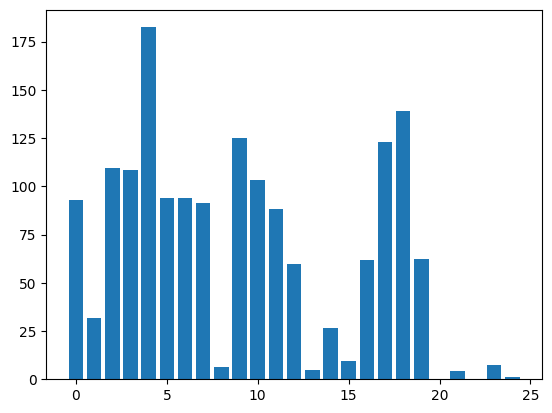

In [ ]:
fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(X_train,Y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Features that correlated at the most with WORK_LIFE_BALANCE_SCORE :
1. Feature 4  = SUPPORTING_OTHERS
2. Feature 17 = PERSONAL_AWARDS 
3. Feature 18 = TIME_FOR_PASSION
4. Feature 9  = TODO_COMPLETED

In [ ]:
#Creating new dataset by using the column that are highly correlated 
selected_columns = ['SUPPORTING_OTHERS', 'TIME_FOR_PASSION', 'TODO_COMPLETED', 'PERSONAL_AWARDS', 'WORK_LIFE_BALANCE_SCORE']
new_df = df_encoded[selected_columns]
null_counts = new_df.isnull().sum()
print(null_counts)

SUPPORTING_OTHERS          0
TIME_FOR_PASSION           0
TODO_COMPLETED             0
PERSONAL_AWARDS            0
WORK_LIFE_BALANCE_SCORE    0
dtype: int64


In [ ]:
print(new_df.head(3))

       SUPPORTING_OTHERS  TIME_FOR_PASSION  TODO_COMPLETED  PERSONAL_AWARDS  \
15601                  8                 3               7                4   
15602                  0                 1               1                3   
15603                 10                 8               9               10   

       WORK_LIFE_BALANCE_SCORE  
15601                    696.4  
15602                    591.9  
15603                    749.5  


In [ ]:
print(new_df.max())

SUPPORTING_OTHERS           10.0
TIME_FOR_PASSION            10.0
TODO_COMPLETED              10.0
PERSONAL_AWARDS             10.0
WORK_LIFE_BALANCE_SCORE    790.5
dtype: float64


In [ ]:
print(new_df.min())

SUPPORTING_OTHERS            0.0
TIME_FOR_PASSION             0.0
TODO_COMPLETED               0.0
PERSONAL_AWARDS              0.0
WORK_LIFE_BALANCE_SCORE    550.3
dtype: float64


In [ ]:
print(new_df.shape)

(370, 5)


Preprocessing the data


In [ ]:
X = new_df.iloc[:, :-1]
Y = new_df.iloc[:,-1]

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.2,random_state=100)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5, random_state=100)
print(X_test)
print(Y_test)


       SUPPORTING_OTHERS  TIME_FOR_PASSION  TODO_COMPLETED  PERSONAL_AWARDS
15606                  2                 2               8                6
15807                 10                 2               7                4
15866                  3                 4              10                7
15922                  1                 0               3                5
15950                 10                 9               6               10
15741                  4                 0               2                2
15619                  4                 1              10               10
15837                 10                 8               8                5
15759                  2                 3               3                7
15750                 10                 2               8                6
15665                  7                 9               7                6
15766                  7                 2               9                2
15622       

Using Random Forest Regression for the baseline error of the model


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)

RandomForestRegressor()

In [ ]:
from sklearn.metrics import mean_squared_error
Y_pred = rf.predict(X_test)
baseline = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("The baseline for the root mean square error of the model is "+str(baseline))


The baseline for the root mean square error of the model is 28.142970804960473


In [ ]:
!pip install sklearn-json


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sklearn_json as skljson
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
import pickle
pkl_filename = "model.pkl"
with open(pkl_filename,'wb') as file:
  pickle.dump(rf,file)

Using Neural Network


In [ ]:
NN_model = Sequential([
    Dense(16),
    #Dropout(0.05),
    Dense(1)
])

NN_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error',
    metrics=tf.keras.metrics.RootMeanSquaredError())

In [ ]:
history = NN_model.fit(X_train, Y_train, epochs=500,
          validation_data=(X_val, Y_val))

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch


Epoch 1/500
10/10 [==============================] - 2s 38ms/step - loss: 650.7092 - root_mean_squared_error: 651.8243 - val_loss: 645.4034 - val_root_mean_squared_error: 646.5257
Epoch 2/500
10/10 [==============================] - 0s 13ms/step - loss: 629.7233 - root_mean_squared_error: 630.5950 - val_loss: 621.1065 - val_root_mean_squared_error: 621.9952
Epoch 3/500
10/10 [==============================] - 0s 10ms/step - loss: 601.3211 - root_mean_squared_error: 602.0887 - val_loss: 587.7578 - val_root_mean_squared_error: 588.5161
Epoch 4/500
10/10 [==============================] - 0s 14ms/step - loss: 562.0198 - root_mean_squared_error: 562.7079 - val_loss: 543.2373 - val_root_mean_squared_error: 544.2269
Epoch 5/500
10/10 [==============================] - 0s 15ms/step - loss: 510.8515 - root_mean_squared_error: 512.1265 - val_loss: 484.5085 - val_root_mean_squared_error: 486.7086
Epoch 6/500
10/10 [==============================] - 0s 12ms/step - loss: 442.9186 - root_mean_squar

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 500])
  plt.xlabel('Epoch')
  plt.ylabel('Error [WORK_LIFE_BALANCE]')
  plt.legend()
  plt.grid(True)

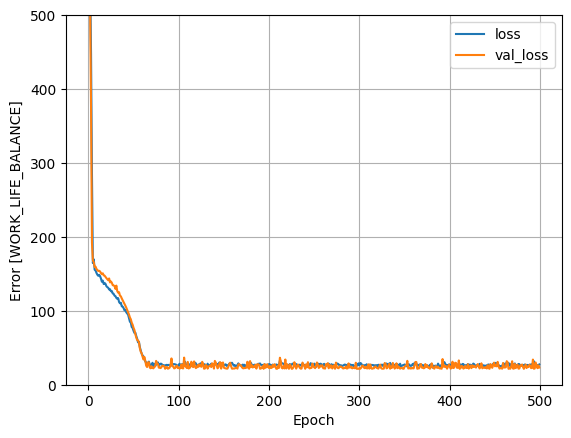

In [ ]:
plot_loss(history)

In [ ]:
#Evaluate the Model
NN_model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 7ms/step - loss: 21.0961 - root_mean_squared_error: 26.6203


[21.096073150634766, 26.620288848876953]

In [ ]:
predictions = NN_model.predict([[8,3,7,4]])
print(predictions)

1/1 [==============================] - 0s 56ms/step
[[667.3636]]


In [ ]:
NN_model.save('stress_model.h5')



In [ ]:
from google.colab import files
files.download('stress_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving the model

In [ ]:
import time
saved_model_path = "/tmp/saved_models/{}".format(int(time.time()))
tf.keras.saving.save_model(
    NN_model, saved_model_path)

In [ ]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 70.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1
  Attempting uninstall: flax
    Found existing installation: flax 0.6.9
    Uninstalling flax-0.6.9:
      Successfully uninstalled flax-0.6.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
statsmodels 0.13.5 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
xar

In [ ]:
!tensorflowjs_converter \
 --input_format=keras_saved_model \
 /tmp/saved_models/1685767474 \
 /tmp/linear

2023-06-05 05:51:53.019126: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-06-05 05:51:56.148174: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Traceback (most recent call last):
  File "/usr/local/bin/tensorflowjs_converter", line 8, in <module>
    sys.exit(pip_main())
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/converters/converter.py", line 827, in pip_main
    main([' '.join(sys.argv[1:])])
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/converters/converter.py", line 831, in main
    convert(argv[0].split(' '))
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/converters/converter.py", line 817, in convert
    _dispatch_converter(input_format, output_format, args, quantization_dtype_map,
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs

Create and train the model using Deep Neural Network

In [ ]:
DNN_model = Sequential([
    Dense(128, input_shape=(4,)),
    Dropout(0.4),
    Dense(64),
    Dense(64),
    Dense(1)
])

In [ ]:
import tensorflow as tf
loss = tf.keras.losses.MeanAbsoluteError()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
metrics = tf.keras.metrics.RootMeanSquaredError()
DNN_model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

DNN_hist = DNN_model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
10/10 [==============================] - 3s 21ms/step - loss: 657.6425 - root_mean_squared_error: 658.9164 - val_loss: 648.3380 - val_root_mean_squared_error: 649.4988
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 627.5341 - root_mean_squared_error: 628.4806 - val_loss: 603.5869 - val_root_mean_squared_error: 604.3845
Epoch 3/100
10/10 [==============================] - 0s 9ms/step - loss: 561.2908 - root_mean_squared_error: 562.7015 - val_loss: 503.1696 - val_root_mean_squared_error: 504.9265
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 412.2262 - root_mean_squared_error: 421.2159 - val_loss: 289.7872 - val_root_mean_squared_error: 310.9588
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 201.7895 - root_mean_squared_error: 237.3656 - val_loss: 186.6861 - val_root_mean_squared_error: 219.4459
Epoch 6/100
10/10 [==============================] - 0s 9ms/step - loss: 183.0632 - root_mean_squared_er

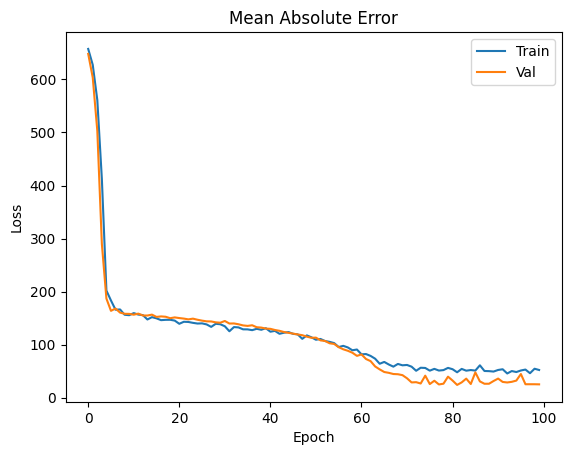

In [ ]:
plt.plot(DNN_hist.history['loss'])
plt.plot(DNN_hist.history['val_loss'])
plt.title('Mean Absolute Error')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

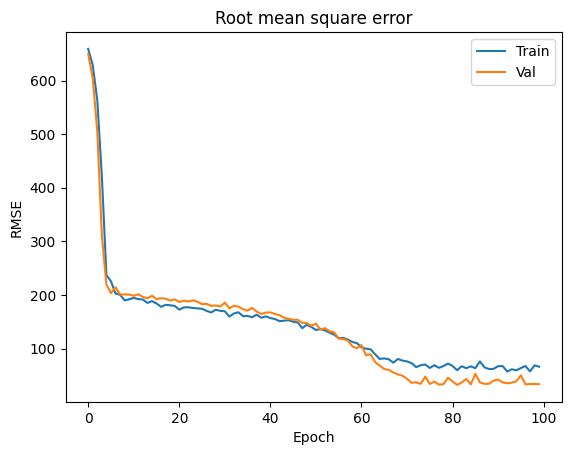

In [ ]:
plt.plot(DNN_hist.history['root_mean_squared_error'])
plt.plot(DNN_hist.history['val_root_mean_squared_error'])
plt.title('Root mean square error')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
NN_model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 19ms/step - loss: 53.1881 - root_mean_squared_error: 59.4405


[53.18809127807617, 59.44050979614258]

In [ ]:
predictions = DNN_model.predict([[8,3,7,4]])
print(predictions)

1/1 [==============================] - 0s 135ms/step
[[689.28534]]
